### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

Regression Task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_table("Twitter.data",sep=",",header=None)
X_data = data.iloc[:,0:77]
Y_data = data.iloc[:,77]

In [4]:
from sklearn.model_selection import train_test_split
X_whytouse, sampled_X, Y_whytouse, sampled_y = train_test_split(X_data, Y_data, shuffle = True, test_size = 0.01, random_state=42)
#Sampling the dataset so that it doesn't take a lot of time for processing

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sampled_X = scaler.fit_transform(sampled_X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(sampled_X, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

Bagging Regressor

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
bag_dtreg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_dtreg.fit(X_train, y_train)
y_bag_dtreg_pred = bag_dtreg.predict(X_test)

In [8]:
print('Train score: {:.2f}'.format(bag_dtreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtreg.score(X_test, y_test)))

Train score: 0.70
Test score: 0.85


In [9]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

linsvr_reg = LinearSVR(random_state=42)
bag_linsvr = BaggingRegressor(linsvr_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_linsvr.fit(X_train, y_train)
y_bag_linsvr_pred = bag_linsvr.predict(X_test)

In [10]:
print('Train score: {:.2f}'.format(bag_linsvr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvr.score(X_test, y_test)))

Train score: 0.17
Test score: 0.15


Pasting Regressor

In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
paste_dtreg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

paste_dtreg.fit(X_train, y_train)
y_paste_dtreg_pred = paste_dtreg.predict(X_test)

In [12]:
print('Train score: {:.2f}'.format(paste_dtreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_dtreg.score(X_test, y_test)))

Train score: 0.68
Test score: 0.85


In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import LinearSVR

linsvr_reg = LinearSVR(random_state=42)
paste_linsvr = BaggingRegressor(linsvr_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

paste_linsvr.fit(X_train, y_train)
y_paste_linsvr_pred = paste_linsvr.predict(X_test)

In [14]:
print('Train score: {:.2f}'.format(paste_linsvr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_linsvr.score(X_test, y_test)))

Train score: 0.17
Test score: 0.15


AdaBoost Boosting

In [15]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)
adaboost_lassoreg = AdaBoostRegressor(lasso_reg, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_lassoreg.fit(X_train, y_train)
y_adaboost_lassoreg_pred = adaboost_lassoreg.predict(X_test)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

In [16]:
print('Train score: {:.2f}'.format(adaboost_lassoreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_lassoreg.score(X_test, y_test)))

Train score: 0.94
Test score: 0.86


In [17]:
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)
adaboost_ridgereg = AdaBoostRegressor(ridge_reg, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_ridgereg.fit(X_train, y_train)
y_adaboost_ridgereg_pred = adaboost_ridgereg.predict(X_test)

In [18]:
print('Train score: {:.2f}'.format(adaboost_ridgereg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(adaboost_ridgereg.score(X_test, y_test)))

Train score: 0.96
Test score: 0.91


Gradient Boosting

In [19]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)

gbrt_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [21]:
print('Train score: {:.2f}'.format(gbrt_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt_reg.score(X_test, y_test)))

Train score: 0.92
Test score: 0.80


PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 70)
X_PCAtrans = pca.fit_transform(sampled_X)

In [23]:
variance_ratio=pca.explained_variance_ratio_

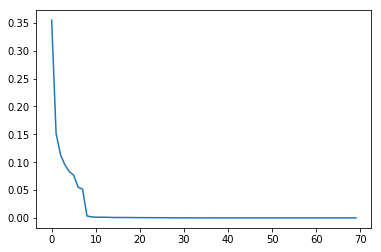

In [24]:
import matplotlib.pyplot as plt
plt.plot(variance_ratio)

From the given plot it appears that the best possible components for  the PCA decomposition is 9.

In [25]:
pca = PCA(n_components = 9)
X_PCAtrans = pca.fit_transform(sampled_X)

In [26]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCAtrans, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

knn Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnScoring =  'r2'
param_grid = {"n_neighbors":[1,2,3,4,5]}
knnr = KNeighborsRegressor()

## Perform the grid search over the parameters
grid_knnr = GridSearchCV(estimator = knnr, param_grid = param_grid, cv = 10, scoring = knnScoring, n_jobs=-1)
grid_knnr.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [28]:
print(grid_knnr.best_estimator_.n_neighbors)
print(grid_knnr.best_score_)

5
0.8538283117826589


In [29]:
report_table = [['knnr', 'k = 5', grid_knnr.score(X_pca_train, y_pca_train), grid_knnr.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095]]

Linear Regression

In [30]:
from sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(X_pca_train, y_pca_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(lin_mod.score(X_pca_train, y_pca_train))
print(lin_mod.score(X_pca_test, y_pca_test))

0.9110722073650035
0.8172991520282636


In [32]:
report_table = report_table + [['LR', '', lin_mod.score(X_pca_train, y_pca_train), lin_mod.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636]]

SGD Regressor

In [33]:
from sklearn.linear_model import SGDRegressor
param_grid = {"max_iter":[1000,10000], "penalty":['l1','l2']}

sgd_reg = SGDRegressor(random_state=0, learning_rate = 'optimal')
grid_sgd = GridSearchCV(estimator = sgd_reg, param_grid = param_grid, cv = 10, scoring = 'r2')
grid_sgd.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [34]:
print(grid_sgd.best_score_)
print(grid_sgd.best_params_)

0.8940861255413455
{'max_iter': 1000, 'penalty': 'l2'}


In [35]:
report_table = report_table + [['SGD', 'max_iteration = 1000, penalty = l2', grid_sgd.score(X_pca_train, y_pca_train), grid_sgd.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9109982697709429,
  0.8205052476842276]]

Ridge Regression

In [36]:
from  sklearn.linear_model import Ridge

param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_ridge = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_ridge.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [37]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.8934237024921862
{'alpha': 0.02}


In [38]:
report_table = report_table + [['Ridge', 'alpha = 0.02', grid_ridge.score(X_pca_train, y_pca_train), grid_ridge.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9109982697709429,
  0.8205052476842276],
 ['Ridge', 'alpha = 0.02', 0.9110721953605223, 0.817378456433001]]

LASSO Regression

In [39]:
from sklearn.linear_model import Lasso
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_lasso = GridSearchCV(Lasso(), param_grid = param_grid, cv = 10, scoring = 'r2')

grid_lasso.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [40]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

0.8934422816087602
{'alpha': 0.02}


In [41]:
report_table = report_table + [['Lasso', 'alpha = 0.02', grid_lasso.score(X_pca_train, y_pca_train), grid_lasso.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9109982697709429,
  0.8205052476842276],
 ['Ridge', 'alpha = 0.02', 0.9110721953605223, 0.817378456433001],
 ['Lasso', 'alpha = 0.02', 0.9110708448666384, 0.8181136055269266]]

SVR Linear

In [42]:
from sklearn.svm import LinearSVR

param_grid  = {"C": [ 10, 100, 1000], 'epsilon':[0.01,0.1,1,10]}
grid_svl = GridSearchCV(estimator = LinearSVR(), param_grid = param_grid, cv = 10, scoring = 'r2')
grid_svl.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10, 100, 1000], 'epsilon': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [43]:
print(grid_svl.best_score_)
print(grid_svl.best_params_)

0.8928179134074224
{'C': 1000, 'epsilon': 10}


In [44]:
report_table = report_table + [['SVR Linear', 'C = 1000, epsilon = 10', grid_svl.score(X_pca_train, y_pca_train), grid_svl.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9109982697709429,
  0.8205052476842276],
 ['Ridge', 'alpha = 0.02', 0.9110721953605223, 0.817378456433001],
 ['Lasso', 'alpha = 0.02', 0.9110708448666384, 0.8181136055269266],
 ['SVR Linear',
  'C = 1000, epsilon = 10',
  0.8968529486588168,
  0.8400398900537003]]

SVM Kernel

In [45]:
from sklearn.svm import SVR
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0], 'epsilon':[0.1,1,10]}

## Define the SVM model
svm_reg = SVR(kernel='rbf') 

## Perform the grid search over the parameters

grid_svrk = GridSearchCV(estimator = svm_reg, param_grid = param_grid, cv = 10, scoring = 'r2', n_jobs=-1)
grid_svrk.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.02, 0.005, 0.002], 'epsilon': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [46]:
print(grid_svrk.best_score_)
print(grid_svrk.best_params_)

0.862658354508517
{'C': 1000, 'epsilon': 10, 'gamma': 0.02}


In [47]:
report_table = report_table + [['SVR K', 'C = 1000, epsilon = 10, gamma = 0.02', grid_svrk.score(X_pca_train, y_pca_train), grid_svrk.score(X_pca_test, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9109982697709429,
  0.8205052476842276],
 ['Ridge', 'alpha = 0.02', 0.9110721953605223, 0.817378456433001],
 ['Lasso', 'alpha = 0.02', 0.9110708448666384, 0.8181136055269266],
 ['SVR Linear',
  'C = 1000, epsilon = 10',
  0.8968529486588168,
  0.8400398900537003],
 ['SVR K',
  'C = 1000, epsilon = 10, gamma = 0.02',
  0.8509186493188093,
  0.8356502897702194]]

Polynomial Regression

In [48]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r2_train_score_list = []
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_pca_train)
    lreg.fit(X_train_poly, y_train)
    r2_train_score_list.append(lreg.score(X_train_poly, y_train))

In [49]:
r2_train_score_list

[0.9110722073650035, 0.922120387377987]

In [50]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_pca_train)
X_test_poly = poly.fit_transform(X_pca_test)
print(lreg.score(X_train_poly, y_pca_train))
print(lreg.score(X_test_poly, y_pca_test))

0.922120387377987
0.8112523544257877


In [51]:
report_table = report_table + [['Polynomial Regression', 'n = 2', lreg.score(X_train_poly, y_pca_train), lreg.score(X_test_poly, y_pca_test)]]
report_table

[['knnr', 'k = 5', 0.9053974112827241, 0.7309094955026095],
 ['LR', '', 0.9110722073650035, 0.8172991520282636],
 ['SGD',
  'max_iteration = 1000, penalty = l2',
  0.9109982697709429,
  0.8205052476842276],
 ['Ridge', 'alpha = 0.02', 0.9110721953605223, 0.817378456433001],
 ['Lasso', 'alpha = 0.02', 0.9110708448666384, 0.8181136055269266],
 ['SVR Linear',
  'C = 1000, epsilon = 10',
  0.8968529486588168,
  0.8400398900537003],
 ['SVR K',
  'C = 1000, epsilon = 10, gamma = 0.02',
  0.8509186493188093,
  0.8356502897702194],
 ['Polynomial Regression', 'n = 2', 0.922120387377987, 0.8112523544257877]]

In [52]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
knnr,knnr,k = 5,0.905397,0.730909
LR,LR,,0.911072,0.817299
SGD,SGD,"max_iteration = 1000, penalty = l2",0.910998,0.820505
Ridge,Ridge,alpha = 0.02,0.911072,0.817378
Lasso,Lasso,alpha = 0.02,0.911071,0.818114
SVR Linear,SVR Linear,"C = 1000, epsilon = 10",0.896853,0.840040
SVR K,SVR K,"C = 1000, epsilon = 10, gamma = 0.02",0.850919,0.835650
Polynomial Regression,Polynomial Regression,n = 2,0.922120,0.811252


Results from the models without PCA

Model name	            Model parameter	                Train accuracy  Test accuracy

knnr	                k = 5	                        8.746797e-01	8.433737e-01

LR		                                                9.617890e-01    6.729077e-01

SGD	                    max_iteraration = 10000 
                        penalty = l2	               -3.504424e+09   -2.237433e+10

Ridge	                alpha = 0.02	                9.533414e-01	8.542991e-01

Lasso	                alpha = 0.02	                9.550640e-01	8.656893e-01

SVR Linear	            C = 1000, 
                        epsilon = 1	                    9.357588e-01	8.986740e-01

SVR K	                C = 1000,  
                        epsilon = 10, 
                        gamma = 0.02	                8.892517e-01	8.681394e-01

Polynomial Regression	n = 2	                        1.000000e+00   -6.483943e+02


PCA does help in getting better results

Neural Network Model for Regression

In [53]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [54]:
model = Sequential()
model.add(Dense(13, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [55]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
4083/4083 [==============================] - 1s 141us/step - loss: 459646.3637 - mean_squared_error: 459646.3637
Epoch 2/100
4083/4083 [==============================] - 0s 70us/step - loss: 421957.6242 - mean_squared_error: 421957.6242
Epoch 3/100
4083/4083 [==============================] - 0s 69us/step - loss: 422281.6413 - mean_squared_error: 422281.6413
Epoch 4/100
4083/4083 [==============================] - 0s 70us/step - loss: 421877.8359 - mean_squared_error: 421877.8359
Epoch 5/100
4083/4083 [==============================] - 0s 70us/step - loss: 421997.8409 - mean_squared_error: 421997.8409
Epoch 6/100
4083/4083 [==============================] - 0s 71us/step - loss: 421861.3479 - mean_squared_error: 421861.3479
Epoch 7/100
4083/4083 [==============================] - 0s 71us/step - loss: 422037.4633 - mean_squared_error: 422037.4633
Epoch 8/100
4083/4083 [==============================] - 0s 63us/step - loss: 422061.6009 - mean_squared_error: 422061.6009
Epoch 9

4083/4083 [==============================] - 0s 61us/step - loss: 421945.3429 - mean_squared_error: 421945.3429
Epoch 67/100
4083/4083 [==============================] - 0s 61us/step - loss: 421848.6188 - mean_squared_error: 421848.6188
Epoch 68/100
4083/4083 [==============================] - 0s 60us/step - loss: 421960.8022 - mean_squared_error: 421960.8022
Epoch 69/100
4083/4083 [==============================] - 0s 60us/step - loss: 422007.3446 - mean_squared_error: 422007.3446
Epoch 70/100
4083/4083 [==============================] - 0s 59us/step - loss: 422045.3343 - mean_squared_error: 422045.3343
Epoch 71/100
4083/4083 [==============================] - 0s 61us/step - loss: 421735.9679 - mean_squared_error: 421735.9679
Epoch 72/100
4083/4083 [==============================] - 0s 61us/step - loss: 421778.2509 - mean_squared_error: 421778.2509
Epoch 73/100
4083/4083 [==============================] - 0s 61us/step - loss: 421893.1042 - mean_squared_error: 421893.1042
Epoch 74/100


In [56]:
model.evaluate(X_test, y_test)

1750/1750 [==============================] - 0s 40us/step


[154292.569125, 154292.569125]

In [57]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.01
